# import necessary package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read data

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Check missing data

In [4]:
# Check Missing data and data types of all collumn 
def check_missing_data(data):
    # Check how many data is missing in every collumn
    total = data.isnull().sum()
    
    # percentage of missing data of every collumn
    percent = total/data.isnull().count() * 100
    
    # Create a table
    table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    
    # Check data type of every column  and fit it in the table
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    table["Types"] = types
    
    #  Transpose the table
    table = np.transpose(table)
        
    return table


In [5]:
check_missing_data(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,object,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64


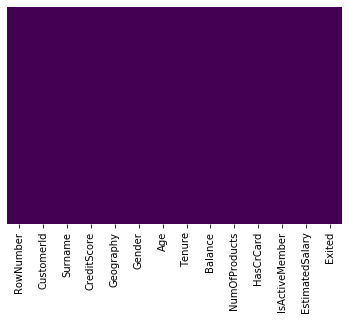

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**No data missing**

In [7]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


This is a bank customer data with 12 feature :
*        RowNumber : This is just count the rownumber
*       CustomerId : The id of a customer
*          Surname : Surname of customer
*      CreditScore : Credit score of a customer
*         Geograpy : The nationality of the customer
*           Gender : Gender of customer
*              Age : Age of customer
*           Tenure : How long their account in this bank
*           Balace : Current Balance of the customer
* NumberOfProducts : Number of product use a customer from the bank
*        HasCrCard : Has the customer credit card or not ! (1 = yes, 0 = No)
*   IsActiveMember : The customer is active or not (1 = yes, 0 = No)
*  EstimatedSalary : Salary of the customer
*           Exited : The customer leaved or not (1 = yes, 0 = No)



**Our goal is to find the cause of leaving the Bank.....**
**That means relations between  Exited collumn to other collumns**

In [8]:
# These collumns have no effect on the target value thats why drop it
data =data.drop(['RowNumber','CustomerId','Surname'],axis=1) 

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Lets try to find the relations with visualization

In [10]:
# This function draw a count plot
def count_plot(target,data,hue):
    plt.figure(figsize=(10,6))
    sns.countplot(target,data=data,hue=hue)

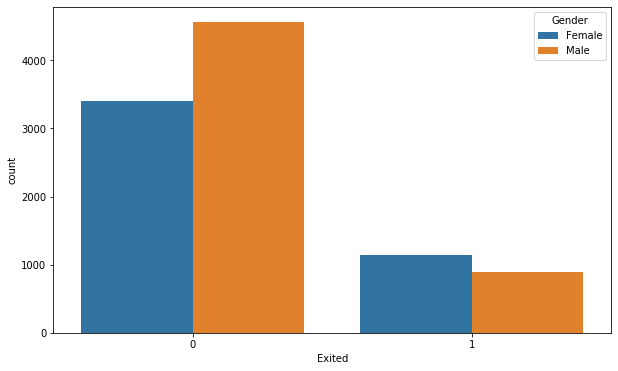

In [11]:
count_plot('Exited',data,'Gender')

**This visualization shows us though the male customers are more than the Female customers but Female customers leaved the bank more than the male customers**

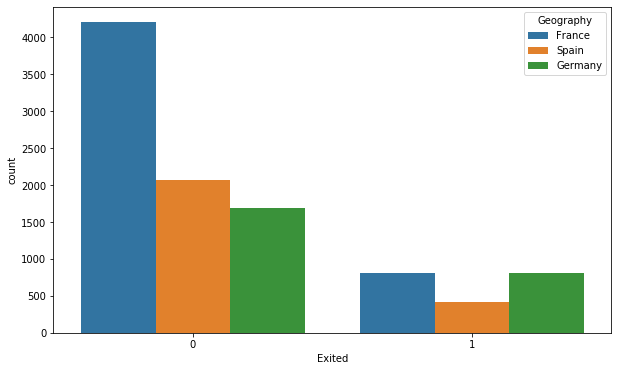

In [12]:
count_plot('Exited',data,'Geography')

**The Frence are the most in the number but Exited rate keeps  Germans the most**

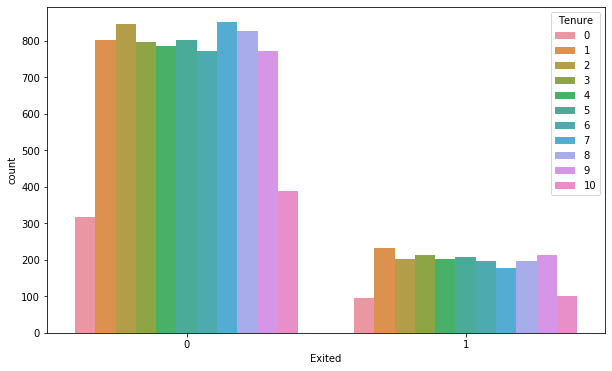

In [13]:
count_plot('Exited',data,'Tenure')

**Younger the account higher the exit rate**

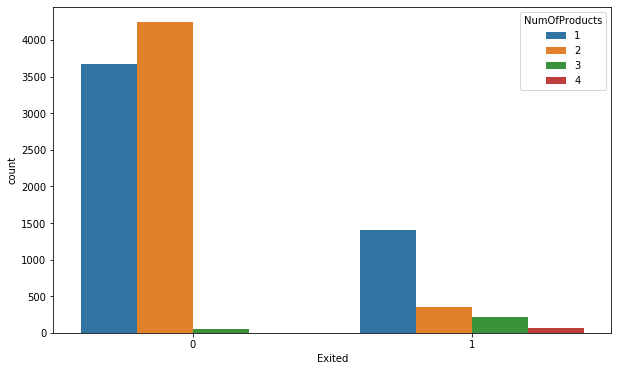

In [14]:
count_plot('Exited',data,'NumOfProducts')

**Less the product use higher the exit rate**

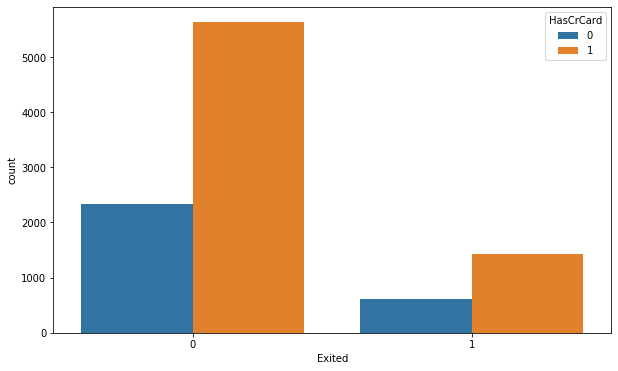

In [15]:
count_plot('Exited',data,'HasCrCard')

**The exit rate of card holders is higher**

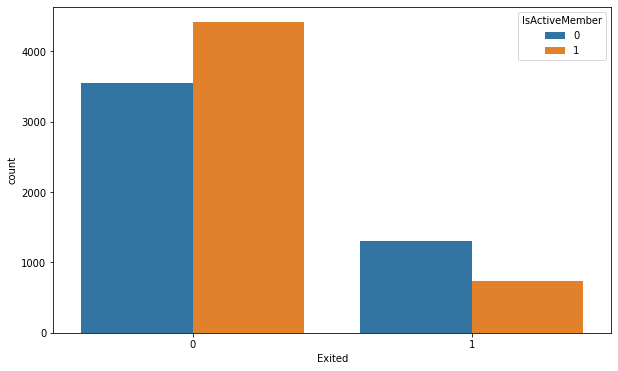

In [16]:
count_plot('Exited',data,'IsActiveMember')

**Inactive members exited the most**

In [20]:
# Create a function that reaturn boxplot
def box_plot(x_axis,y_axis,df,string):
    plt.figure(figsize=(10,6))
    plt.title(string)
    sns.boxplot(x=x_axis,y=y_axis,data = df)

In [45]:
# Create a function that reaturn boxplot
def dis_plot(x_axis,df,bins):
    plt.figure(figsize=(10,6))
    sns.distplot(df[x_axis],bins = bins,hist=False)

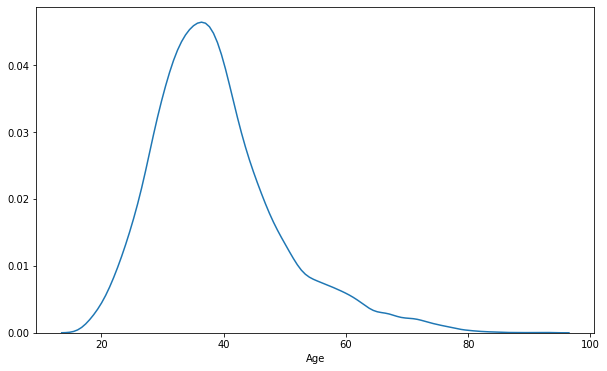

In [46]:
dis_plot('Age',data,10)

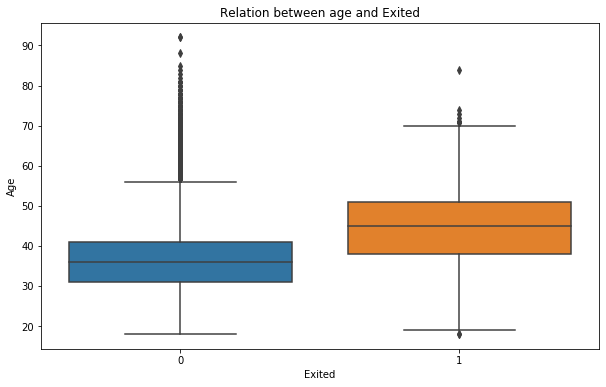

In [21]:
box_plot('Exited','Age',data,'Relation between age and Exited')

**Around 38 to 52 aged customers extited most and 32 to 42 aged customers stayed most**

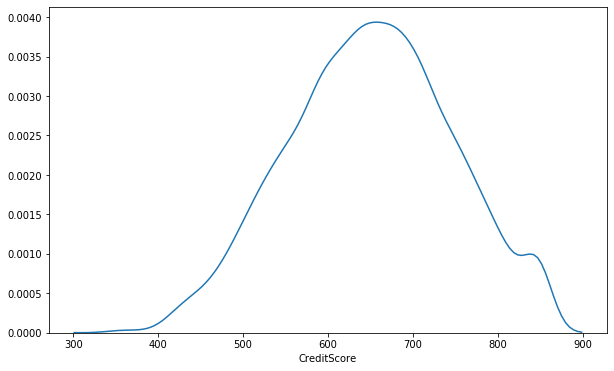

In [47]:
dis_plot('CreditScore',data,20)


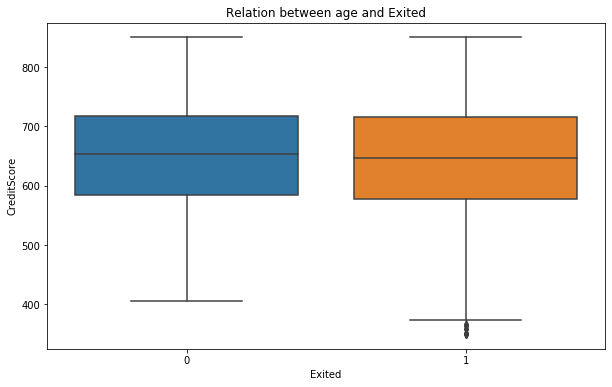

In [22]:
box_plot('Exited','CreditScore',data,'Relation between age and Exited')

**Its didn't show us much information**

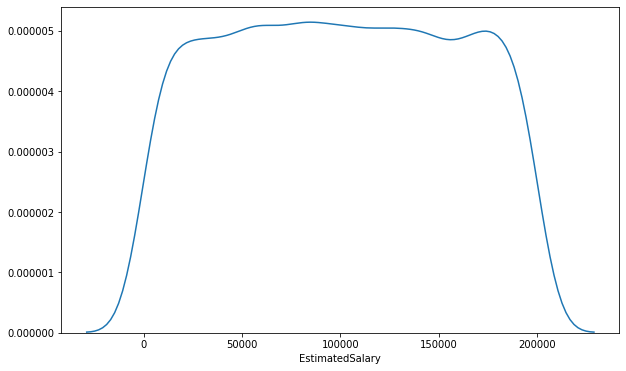

In [48]:
dis_plot('EstimatedSalary',data,20)

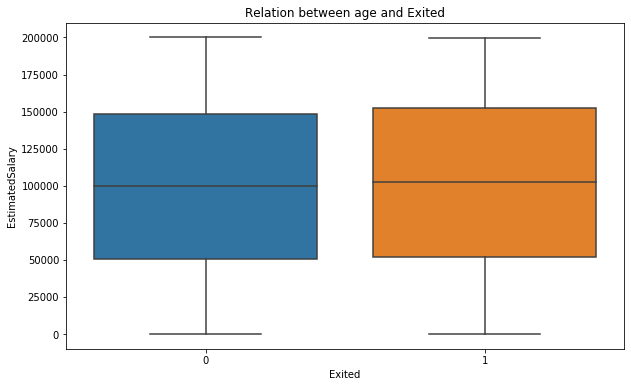

In [23]:
box_plot('Exited','EstimatedSalary',data,'Relation between age and Exited')

**Its also doesn't show us much information**

In [55]:
# Create a function that reaturn boxplot
def box_plot_2(x_axis,y_axis,df,hue):
    plt.figure(figsize=(10,8))
    sns.boxplot(x=x_axis,y=y_axis,data = df,hue=hue)

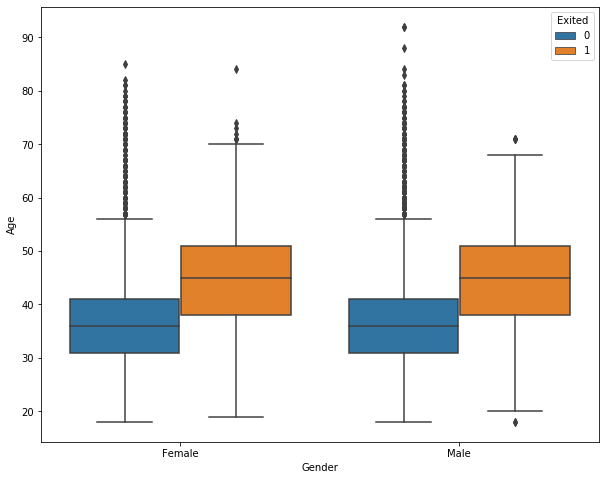

In [56]:
box_plot_2('Gender','Age',data,'Exited')

**For male and Female both case higher aged customers exited rate is high**

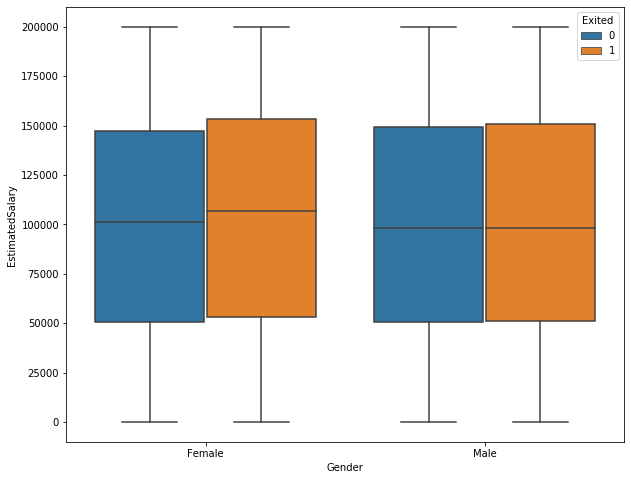

In [57]:
box_plot_2('Gender','EstimatedSalary',data,'Exited')

**No information**